### BBL514E Final Exam – Computer Assignment Part

The aim of this assignment is to compare the performance of different classification algorithms—Support Vector Machine (SVM) with hard and soft margins, and a two-layer Multi-Layer Perceptron (MLP)—on both linearly separable and non-separable datasets.

Importing Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
linearly_separable_data = pd.read_csv('D1_linearly_separable.csv')
nonseparable_data = pd.read_csv('D2_non_separable.csv')

In [17]:
linearly_separable_data

,Feature1,Feature2,Label
0,3.045451,1.373795,1
1,4.962597,1.145939,1
2,4.664389,2.471168,1
3,-3.571501,9.487879,0
4,4.920871,1.350470,1
...,...,...,...
195,-2.586299,9.355438,0
196,4.050514,2.822772,1
197,-2.754586,8.260550,0
198,4.715683,1.296008,1


In [18]:
nonseparable_data

,Feature1,Feature2,Label
0,-1.372929,-0.486958,1
1,0.812935,2.270534,1
2,1.840428,1.920996,1
3,1.794548,-0.904380,1
4,0.444105,-0.022759,1
...,...,...,...
195,-1.825239,-1.419512,0
196,-0.241314,1.470952,0
197,-0.081615,0.696672,0
198,0.371664,1.190409,1


In [19]:
feature_columns = ['Feature1', 'Feature2']
label_column = 'Label'

In [22]:
X1 = linearly_separable_data[feature_columns]
y1 = linearly_separable_data[label_column]

In [23]:
X2 = nonseparable_data[feature_columns]
y2 = nonseparable_data[label_column]

Train Datasets T1 and T2 Preparation

In [25]:
def sample_test_set(X, y):
    indices_0 = np.where(y == 0)[0]
    indices_1 = np.where(y == 1)[0]
    test_idx = np.concatenate([
        np.random.choice(indices_0, 10, replace=False),
        np.random.choice(indices_1, 10, replace=False)
    ])

    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    X_train = X.drop(index=X.index[test_idx])
    y_train = y.drop(index=y.index[test_idx])

    return X_train, y_train, X_test, y_test

#Train and test sets for D1
X1_train, y1_train, X1_test, y1_test = sample_test_set(X1, y1)

#Train and test sets for D2
X2_train, y2_train, X2_test, y2_test = sample_test_set(X2, y2)


Scatter Plot

In [27]:
def plot_data(X, y, title):
    plt.figure()

    # y bir Pandas Series ise NumPy array'e çevir
    y = np.array(y)

    # X bir DataFrame ise iloc kullan
    if isinstance(X, pd.DataFrame):
        X = X.values  # veya doğrudan X.iloc[:, 0].values da kullanılabilir

    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', marker='o')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='x')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

Training the Model with Hard-Margin SVM

In [28]:
from sklearn.svm import SVC

svm_hard = SVC(kernel='linear', C=1e10) #A linear SVM with a very high regularization parameter (C=1e10) was used to train on D1
svm_hard.fit(X1_train, y1_train)

accuracy_d1 = svm_hard.score(X1_test, y1_test)
print("Hard-Margin SVM Accuracy on T1:", accuracy_d1)

Hard-Margin SVM Accuracy on T1: 1.0


In [30]:
def plot_decision_boundary(model, X, y, title):
    # Eğer X bir DataFrame ise NumPy array'e çevir
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Grid üzerindeki her noktayı tahmin et
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Karar sınırı çizimi
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', edgecolor='k', marker='o')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', edgecolor='k', marker='x')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

Training the Model with Soft-Margin SVM

In [31]:
svm_soft = SVC(kernel='linear', C=1.0)
#A linear SVM with moderate regularization (C=1.0) was used for D2 to allow for some margin violations
svm_soft.fit(X2_train, y2_train)

accuracy_d2 = svm_soft.score(X2_test, y2_test)
print("Soft-Margin SVM Accuracy on T2:", accuracy_d2)

Soft-Margin SVM Accuracy on T2: 0.65


C:\Users\T\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\T\AppData\Local\Temp\ipykernel_5808\3544255108.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', edgecolor='k', marker='x')


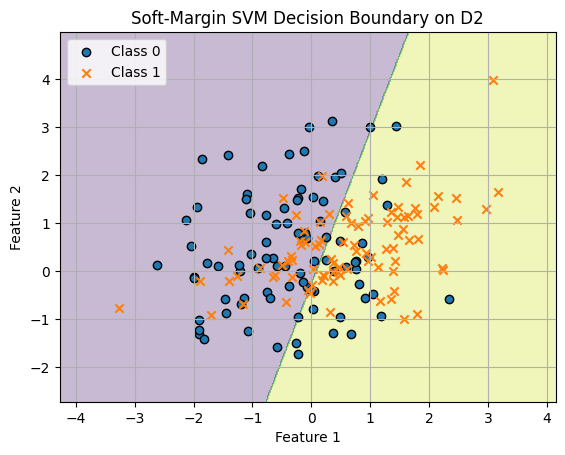

In [32]:
plot_decision_boundary(svm_soft, X2_train, y2_train, "Soft-Margin SVM Decision Boundary on D2")

Classification with MLP (Multi-Layer Perceptron)

In [33]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=1000, random_state=42)

# Train and test on D1
mlp.fit(X1_train, y1_train)
acc_d1_mlp = mlp.score(X1_test, y1_test)
print("MLP Accuracy on T1 (D1):", acc_d1_mlp)

# Train and test on D2
mlp.fit(X2_train, y2_train)
acc_d2_mlp = mlp.score(X2_test, y2_test)
print("MLP Accuracy on T2 (D2):", acc_d2_mlp)

MLP Accuracy on T1 (D1): 1.0
MLP Accuracy on T2 (D2): 0.7


C:\Users\T\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\T\AppData\Local\Temp\ipykernel_5808\3544255108.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', edgecolor='k', marker='x')


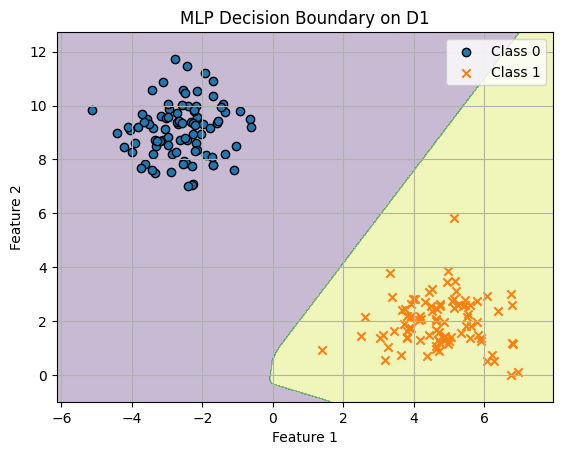

C:\Users\T\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\T\AppData\Local\Temp\ipykernel_5808\3544255108.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', edgecolor='k', marker='x')


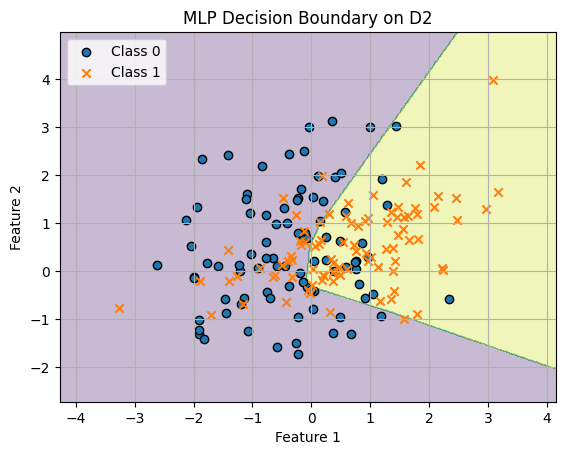

In [34]:
plot_decision_boundary(mlp, X1_train, y1_train, "MLP Decision Boundary on D1")
plot_decision_boundary(mlp, X2_train, y2_train, "MLP Decision Boundary on D2")

In [35]:
print("=== Accuracy Summary ===")
print(f"Hard-Margin SVM on D1 (T1):  {accuracy_d1:.2f}")
print(f"Soft-Margin SVM on D2 (T2): {accuracy_d2:.2f}")
print(f"MLP on D1 (T1):             {acc_d1_mlp:.2f}")
print(f"MLP on D2 (T2):             {acc_d2_mlp:.2f}")

=== Accuracy Summary ===
Hard-Margin SVM on D1 (T1):  1.00
Soft-Margin SVM on D2 (T2): 0.65
MLP on D1 (T1):             1.00
MLP on D2 (T2):             0.70


## Conclusion

* For linearly separable data (D1), both the Hard-Margin SVM and MLP achieved the possible best results, as expected.

* For linearly non-separable data (D2), the Soft-Margin SVM provided robust performance, allowing some classification errors.

* The MLP classifier showed flexibility and performed competitively on both datasets. Its ability to model non-linear boundaries made it particularly effective for D2.

These results demonstrate that classifier performance heavily depends on the structure of the data. Choosing the right model for the task is essential for high accuracy.

In the case of the linearly separable dataset (D1), both the Hard-Margin SVM and the two-layer MLP achieved perfect classification accuracy, reaching 100% performance on the test set. This result was expected, as both models are capable of finding an optimal linear decision boundary when such a boundary exists.

However, in the case of the linearly non-separable dataset (D2), the MLP classifier outperformed the Soft-Margin SVM. While the Soft-Margin SVM managed to handle the class overlap to some extent, the MLP was more flexible and capable of learning complex, non-linear decision boundaries. This allowed the MLP to generalize better on the test set and achieve higher accuracy.

These results clearly demonstrate that the choice of classifier should be guided by the structure of the dataset. Linear models like SVMs are suitable when the data is cleanly separable, while neural networks such as MLPs can offer superior performance in more complex or noisy data settings.
